# Example to interact with thredds on python
for matlab please see howto netcdf on github

In [81]:
## importing libraries 
import netCDF4 as nc
from matplotlib import pyplot as plt 
import numpy as np
import datetime as DT
# show plots inline for jupyter notebook
%matplotlib inline 

# Load file (meta data only -  not data)
(ncdisp in matlab)

In [82]:
# oregon inlet waverider wave buoy 
url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/oceanography/waves/waverider-26m/waverider-26m.ncml'
ncfile = nc.Dataset(url)  # file is loaded as ncfile 

#look at Global MetaData

In [83]:
print ncfile

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    featureType: timeSeries
    title: FRF 26m Datawell Waverider Buoy
    summary: USACE/COAB collected directional wave data with a Datawell Directional Waverider (Mk III) approximately 
 10 miles (16.1 km) offshore of Duck (FRF), NC. The nominal depth for each deployment was approximately 
 26m NAVD88. Directional spectra Fourier coefficients are computed onboard the buoy and transmitted via 
 Iridium satellite link at half-hour intervals, raw data record lengths are 30 minutes. The USACE funds this
 data collection through the Coastal Data Information Program (CDIP), UCSD San Diego, CA.  The buoy computed 
 Directional Fourier coefficients are provided but have been rotated from magnetic north to clockwise from 
 true north.  Two dimensional (2D) frequency-direction spectra are computed using an Maximum Likelihood Estimator
 (MLE) method.  See - Oltman-Shay, J., Guza, R.T., 1984. A data-ada

# Attributes are not only there for looks

In [84]:
print ncfile.cross_shore_angle

71.8


# Look at Varibles in netCDF file

In [85]:
print 'These are the variables in this file\n'
for var in ncfile.variables.keys():
    print var

These are the variables in this file

station_name
waveFrequency
waveDirectionBins
depth
lat
lon
waveHs
wavePeakFrequency
waveTm2
wavePeakDirectionPeakFrequency
waveMeanDirection
waveMeanDirectionPeakFrequency
time
qcFlagE
qcFlagD
directionalPeakSpread
spectralWidthParameter
waveDirectionEstimator
waveEnergyDensity
directionalWaveEnergyDensity
waveA1Value
waveB1Value
waveA2Value
waveB2Value


#  go Get time (only time)

In [96]:
print 'This is an example of variable with attributes\n'
print ncfile['directionalWaveEnergyDensity']
alltime = ncfile['time'][:] # to get data use index or [:]
print 'This is the last record as epoch time %f' %alltime[-1]
alltimeDateTime = nc.num2date(alltime, ncfile['time'].units)  # convert time to useful 
print 'This is  the last record as python datetime object %s' %alltimeDateTime[-1]
print '\n'


This is an example of variable with attributes

<type 'netCDF4._netCDF4.Variable'>
float32 directionalWaveEnergyDensity(time, waveFrequency, waveDirectionBins)
    _FillValue: 7.39774e+31
    units: m2 s deg-1
    standard_name: sea_surface_wave_directional_variance_spectral_density
    long_name: 2D Wave Energy Density Spectrum
    short_name: Energy Density
    _ChunkSizes: [ 1 62 72]
unlimited dimensions: 
current shape = (127315, 62, 72)
filling off

This is the last record as epoch time 1496291880.000002
This is  the last record as python datetime object 2017-06-01 04:38:00.000002




# Go get all wave Heights associated with all times using (:)

In [87]:
allHs = ncfile['waveHs'][:]  # all wave heights to match time 'alltime'

(0, 5)

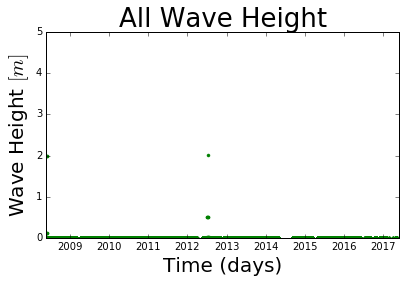

In [90]:
plt.plot(alltimeDateTime, allHs, 'g.')
plt.title('All Wave Height', fontsize=26)
plt.xlabel('Time (days)', fontsize=20)
plt.ylabel('Wave Height $[m]$', fontsize=20)
plt.tight_layout()
plt.ylim([0, 5])


# Now Lets get times of interest 

In [91]:
dateIminterestedIn = DT.datetime(2017, 5,7)   # this is the date i'm interested in

In [92]:
tt = (alltimeDateTime > dateIminterestedIn)  # produces true/false array 
print 'There are %d records of interest' %tt.sum()  # Trues count as 1

There are 10 records of interest


# now segment those for plot 

In [93]:
Hs_seg = ncfile['waveHs'][tt]  # get those records for interest
t_seg = nc.num2date(ncfile['time'][tt], ncfile['time'].units)

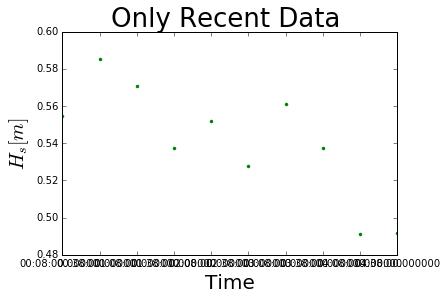

In [94]:
plt.figure()
plt.plot(t_seg, Hs_seg, 'g.')
plt.title('Only Recent Data ', fontsize=26)
plt.ylabel('$H_s [m]$', fontsize=20)
plt.xlabel('Time', fontsize=20)